# Movie Data Analysis

![](./images/logo.png)

# **Overview**

This project analyzes the movie genres, finance and release dates that impact the movie popularity and profit from film data collected in recent years (2010-2019). Descriptive analysis shows that animation, adventure, Sci-Fi and musical are the most popular and profitable types of movie. The analysis can help Microsoft to get into movie industry and establish a studio that produces profitable, and more importantly, popular first movie.

![](./images/microsoft_movies.png)

# **Business Values**

The movie industry has been growing rapidly and more companies create their own original contents. It is very important for the new Microsoft movie studio to invest resources on the first movie that will be popular and profitable. A successful first movie will help Microsoft to break into the movie industry and expand business peripherals. Using the movie production budget, gross, release date and popularity data, I described that genres, release dates and production budgets needs to be considered to produce a popular and profitable movie.  

# **Data Understanding**

There are several movie datasets collected from different sources. The data files provide the movie titles, their genres, finance, release dates, and popularities. The information can be merged into one dataframe by using the movie titles as key for further analysis. The datasets used for analysis are from:
- [IMDB](https://www.imdb.com/)
- [TheMovieDB](https://www.themoviedb.org/)
- [The Numbers](https://www.the-numbers.com/)

## **CSV and TSV data**

The datasets from [TheMovieDB](https://www.themoviedb.org/) and [The Numbers](https://www.the-numbers.com/) are stored in `zippedData/tmdb.movies.csv.gz` and `zippedData/tn.movie_budgets.csv.gz`

In [1]:
# import python packages for data loading and understanding
import pandas as pd
import numpy as np

In [2]:
tmdb_movies = pd.read_csv("zippedData/tmdb.movies.csv.gz")
tn_movie_budgets = pd.read_csv("zippedData/tn.movie_budgets.csv.gz")

In [3]:
tmdb_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [4]:
tn_movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


### **tmdb_movies data**

`tmdb_movies` data has move titles, popularity and release dates that range from 1930 to 2020.

In [5]:
# convert release_date to pandas datetime
tmdb_movies['release_date'] = pd.to_datetime(tmdb_movies['release_date'])
tmdb_movies.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [6]:
tmdb_movies['release_date'].describe(datetime_is_numeric=True)

count                            26517
mean     2014-06-10 02:50:14.730173184
min                1930-04-29 00:00:00
25%                2012-06-29 00:00:00
50%                2014-09-19 00:00:00
75%                2016-10-01 00:00:00
max                2020-12-25 00:00:00
Name: release_date, dtype: object

### **tn_movie_budgets**

`tn_movie_budgets` data contains movie title, production_budget, gross and release dates that range from 1915 to 2020

In [7]:
# convert release_date to pandas datetime
tn_movie_budgets['release_date'] = pd.to_datetime(tn_movie_budgets['release_date'])
tn_movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,2009-12-18,Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,2019-06-07,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,2015-05-01,Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [8]:
tn_movie_budgets['release_date'].describe(datetime_is_numeric=True)

count                             5782
mean     2004-07-06 05:20:31.546177792
min                1915-02-08 00:00:00
25%                2000-04-22 18:00:00
50%                2007-03-02 00:00:00
75%                2012-12-25 00:00:00
max                2020-12-31 00:00:00
Name: release_date, dtype: object

##  **SQL data**

The datasets from [IMDB](https://www.imdb.com/) are stored in zippedData/im.db.zip and in SQL database.

In [9]:
# unzip `zippedData/im.db.zip` since SQLite won't work on zipped data
!unzip -n zippedData/im.db.zip

In [10]:
# import SQLite package to load data from database
import sqlite3

In [11]:
conn = sqlite3.connect('im.db')

In [12]:
# get the schema from the database
schema_df = pd.read_sql("""
    SELECT *
    FROM sqlite_master;
""", conn)
schema_df

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."


In [13]:
# get the column names from each table in the database
for i in range(0,7):
    print(schema_df['sql'].iloc[i])

CREATE TABLE "movie_basics" (
"movie_id" TEXT,
  "primary_title" TEXT,
  "original_title" TEXT,
  "start_year" INTEGER,
  "runtime_minutes" REAL,
  "genres" TEXT
)
CREATE TABLE "directors" (
"movie_id" TEXT,
  "person_id" TEXT
)
CREATE TABLE "known_for" (
"person_id" TEXT,
  "movie_id" TEXT
)
CREATE TABLE "movie_akas" (
"movie_id" TEXT,
  "ordering" INTEGER,
  "title" TEXT,
  "region" TEXT,
  "language" TEXT,
  "types" TEXT,
  "attributes" TEXT,
  "is_original_title" REAL
)
CREATE TABLE "movie_ratings" (
"movie_id" TEXT,
  "averagerating" REAL,
  "numvotes" INTEGER
)
CREATE TABLE "persons" (
"person_id" TEXT,
  "primary_name" TEXT,
  "birth_year" REAL,
  "death_year" REAL,
  "primary_profession" TEXT
)
CREATE TABLE "principals" (
"movie_id" TEXT,
  "ordering" INTEGER,
  "person_id" TEXT,
  "category" TEXT,
  "job" TEXT,
  "characters" TEXT
)


In [14]:
# table `movie_basics` contains primary_title, original_title and genres for further analysis

imdb_movie = pd.read_sql("""
    SELECT primary_title, original_title, start_year, genres
    FROM movie_basics
""", conn)
imdb_movie.head()

,primary_title,original_title,start_year,genres
0,Sunghursh,Sunghursh,2013,"Action,Crime,Drama"
1,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,"Biography,Drama"
2,The Other Side of the Wind,The Other Side of the Wind,2018,Drama
3,Sabse Bada Sukh,Sabse Bada Sukh,2018,"Comedy,Drama"
4,The Wandering Soap Opera,La Telenovela Errante,2017,"Comedy,Drama,Fantasy"


In [15]:
imdb_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   primary_title   146144 non-null  object
 1   original_title  146123 non-null  object
 2   start_year      146144 non-null  int64 
 3   genres          140736 non-null  object
dtypes: int64(1), object(3)
memory usage: 4.5+ MB


# **Data Preparation**

## **Cleaning Data**

- For `tmdb_movies` data, I drop the unnecessary columns and create new column contains the release month and year of the movie and save to a new dataframe `tmdb`.

- For `tn_movie_budgets` data, I convert the money columns to integer for easier engineering and analysis. I also drop the unnecessary columns.

In [16]:
# drop unnecessary columns
tmdb = tmdb_movies.drop(columns=['Unnamed: 0',  'genre_ids', 'id', 'original_language', 'title', 'vote_average', 'vote_count'])

# create new column release_month and release_year.
# convert release_year to integer
tmdb['release_month'] = tmdb['release_date'].dt.month
tmdb['release_year'] = tmdb['release_date'].dt.year.astype(np.int64)

tmdb.head()

,original_title,popularity,release_date,release_month,release_year
0,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,11,2010
1,How to Train Your Dragon,28.734,2010-03-26,3,2010
2,Iron Man 2,28.515,2010-05-07,5,2010
3,Toy Story,28.005,1995-11-22,11,1995
4,Inception,27.920,2010-07-16,7,2010


In [17]:
# convert money cloumns in tn_movie_budget to integer

# define a function that converts money in pandas series to integer 
def money_to_int(pd_series):
    pd_series = pd_series.str.strip('$').str.replace(',', '').astype('int64')
    return pd_series

tn_movie_budgets['production_budget'] = money_to_int(tn_movie_budgets['production_budget'])
tn_movie_budgets['domestic_gross'] = money_to_int(tn_movie_budgets['domestic_gross'])
tn_movie_budgets['worldwide_gross'] = money_to_int(tn_movie_budgets['worldwide_gross'])

# drop unnecessary columns
tn_movie_budgets.drop(columns=['id'], inplace=True)

tn_movie_budgets.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,2009-12-18,Avatar,425000000,760507625,2776345279
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,2019-06-07,Dark Phoenix,350000000,42762350,149762350
3,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963
4,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


## **Merging Datasets**

Merge the three datasets into a single dataset for feature enginerring and analysis. I exclude the movies that were released before 2010. The analysis on recent movies gives more insigts on the film industry. 

In [18]:
# merge `tmdb` and `imdb_movie` datasets
# there are movies with the same title but different release year. both title and release year need to be considered.

tmdb_imdb = pd.merge(imdb_movie, tmdb, left_on=['original_title', 'start_year'], right_on=['original_title', 'release_year'])

# merge `tmdb_imdb` and `tn_movie_budgets` datasets

movie_df = pd.merge(tmdb_imdb, tn_movie_budgets, left_on=['original_title', 'release_date'], right_on=['movie', 'release_date'])

In [19]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1227 entries, 0 to 1226
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   primary_title      1227 non-null   object        
 1   original_title     1227 non-null   object        
 2   start_year         1227 non-null   int64         
 3   genres             1224 non-null   object        
 4   popularity         1227 non-null   float64       
 5   release_date       1227 non-null   datetime64[ns]
 6   release_month      1227 non-null   int64         
 7   release_year       1227 non-null   int64         
 8   movie              1227 non-null   object        
 9   production_budget  1227 non-null   int64         
 10  domestic_gross     1227 non-null   int64         
 11  worldwide_gross    1227 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(6), object(4)
memory usage: 124.6+ KB


In [20]:
# drop unnecessary columns

movie_df = movie_df.drop(columns=['primary_title', 'start_year'])

# There are 3 NaN genres entries, consider they are only 0.2% of total entries, those rows that have NaN genres are dropped.
movie_df.dropna(inplace=True)

# drop duplicates considering the different movie has same title but different release date
movie_df.drop_duplicates(subset= ['original_title', 'release_date'], inplace=True)

# rename column release_date_x and reset index
movie_df.rename(columns={'release_date_x':'release_date'}, inplace=True)
movie_df = movie_df.reset_index(drop=True)

In [21]:
movie_df.head()

,original_title,genres,popularity,release_date,release_month,release_year,movie,production_budget,domestic_gross,worldwide_gross
0,The Secret Life of Walter Mitty,"Adventure,Comedy,Drama",10.743,2013-12-25,12,2013,The Secret Life of Walter Mitty,91000000,58236838,187861183
1,A Walk Among the Tombstones,"Action,Crime,Drama",19.373,2014-09-19,9,2014,A Walk Among the Tombstones,28000000,26017685,62108587
2,Jurassic World,"Action,Adventure,Sci-Fi",20.709,2015-06-12,6,2015,Jurassic World,215000000,652270625,1648854864
3,The Three Stooges,"Comedy,Family",9.358,2012-04-13,4,2012,The Three Stooges,30000000,44338224,54052249
4,Tangled,"Adventure,Animation,Comedy",21.511,2010-11-24,11,2010,Tangled,260000000,200821936,586477240


In [22]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1087 entries, 0 to 1226
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   original_title     1087 non-null   object        
 1   genres             1087 non-null   object        
 2   popularity         1087 non-null   float64       
 3   release_date       1087 non-null   datetime64[ns]
 4   release_month      1087 non-null   int64         
 5   release_year       1087 non-null   int64         
 6   movie              1087 non-null   object        
 7   production_budget  1087 non-null   int64         
 8   domestic_gross     1087 non-null   int64         
 9   worldwide_gross    1087 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(5), object(3)
memory usage: 93.4+ KB


## **Feature Engineering**

In [23]:
# create feature `porfit` from 'worldwide_gross' and 'production_budget'

movie_df['profit'] = movie_df['worldwide_gross'] - movie_df['production_budget']

Create feature `popularity_level` that represents four levels of popularity.

In [24]:
# the popularity ranges from 0.6 to 80 with 25% at 8, 50% at 12, and 75% at 17
movie_df['popularity'].describe()

count    1087.000000
mean       13.840531
std         8.237854
min         0.600000
25%         8.712500
50%        12.017000
75%        16.640000
max        80.773000
Name: popularity, dtype: float64

In [25]:
# set popularity below 8 as low, 8-12 as average, 12-17 as good, above 17 as high
# define a function to set popularity level

def set_level(popularity_num):
    if popularity_num < 8:
        return 'low'
    elif popularity_num >=8 and popularity_num <= 12:
        return 'average'
    elif popularity_num >12 and popularity_num <= 17:
        return 'good'
    else:
        return 'high'

# create feature 'popularity_level'
movie_df['popularity_level'] = movie_df['popularity'].map(set_level)

In [26]:
movie_df.head()

,original_title,genres,popularity,release_date,release_month,release_year,movie,production_budget,domestic_gross,worldwide_gross,profit,popularity_level
0,The Secret Life of Walter Mitty,"Adventure,Comedy,Drama",10.743,2013-12-25,12,2013,The Secret Life of Walter Mitty,91000000,58236838,187861183,96861183,average
1,A Walk Among the Tombstones,"Action,Crime,Drama",19.373,2014-09-19,9,2014,A Walk Among the Tombstones,28000000,26017685,62108587,34108587,high
2,Jurassic World,"Action,Adventure,Sci-Fi",20.709,2015-06-12,6,2015,Jurassic World,215000000,652270625,1648854864,1433854864,high
3,The Three Stooges,"Comedy,Family",9.358,2012-04-13,4,2012,The Three Stooges,30000000,44338224,54052249,24052249,average
4,Tangled,"Adventure,Animation,Comedy",21.511,2010-11-24,11,2010,Tangled,260000000,200821936,586477240,326477240,high


In [27]:
movie_df['release_year'].value_counts()

2015    144
2016    138
2014    129
2011    128
2012    117
2010    110
2013    109
2018    108
2017    104
Name: release_year, dtype: int64

In [28]:
# save cleaned data as CSV file
movie_df.to_csv('./cleaned_movie_df.csv')

# **Analysis**

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

## **Movie Release Month**

The movie release month in a year impacts its popularity and profit. This effects is probably due to the holidays or school breaks in certain months.

In [30]:
# the popularity and profit spread out quite large there are some extreme data. Thus using median to represent the feature
# is better than mean.

movie_df[['popularity', 'profit']].describe()

,popularity,profit
count,1087.000000,1.087000e+03
mean,13.840531,1.063226e+08
std,8.237854,1.981943e+08
min,0.600000,-1.104502e+08
25%,8.712500,7.995660e+05
50%,12.017000,3.229526e+07
75%,16.640000,1.157694e+08
max,80.773000,1.748134e+09


In [31]:
# the popularity and profit of each month are grouped by month and the median is caculcated cross the years  

release_month_impact = movie_df[['popularity', 'release_month' , 'profit']].groupby(['release_month']).median()

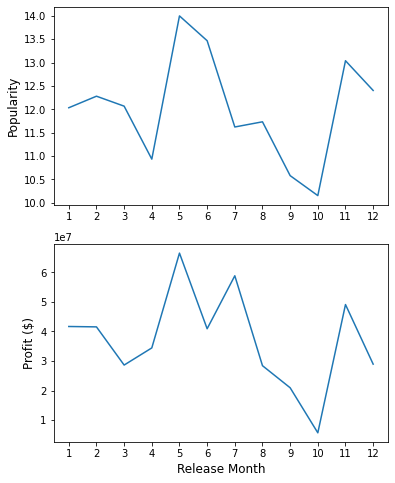

In [32]:
# create plots
release_month_fig, release_month_axes = plt.subplots(figsize = (6, 8), ncols = 1, nrows = 2)

release_month_axes[0].set_ylabel('Popularity', fontsize = 12)

release_month_axes[1].set_xlabel('Release Month', fontsize = 12)
release_month_axes[1].set_ylabel('Profit ($)', fontsize = 12)

release_month_axes[0].set_xticks(np.arange(1,13,1))
release_month_axes[1].set_xticks(np.arange(1,13,1))

release_month_axes[0].plot(release_month_impact['popularity'])
release_month_axes[1].plot(release_month_impact['profit'])

plt.savefig("./images/release_month_impact.png", dpi=250)
plt.show();

##  **Movie Genres**

Certain movie genres are more popular and profitable.

In [33]:
# create genres_list column to convert movie that has multiple genres as string to a list of genres

movie_df['genres_list'] = movie_df['genres'].apply(lambda x: x.split(','))

In [34]:
# seperate the list of genres into single entry 
movie_genres_df = movie_df.explode('genres_list')

In [35]:
movie_genres_df.head()

,original_title,genres,popularity,release_date,release_month,release_year,movie,production_budget,domestic_gross,worldwide_gross,profit,popularity_level,genres_list
0,The Secret Life of Walter Mitty,"Adventure,Comedy,Drama",10.743,2013-12-25,12,2013,The Secret Life of Walter Mitty,91000000,58236838,187861183,96861183,average,Adventure
0,The Secret Life of Walter Mitty,"Adventure,Comedy,Drama",10.743,2013-12-25,12,2013,The Secret Life of Walter Mitty,91000000,58236838,187861183,96861183,average,Comedy
0,The Secret Life of Walter Mitty,"Adventure,Comedy,Drama",10.743,2013-12-25,12,2013,The Secret Life of Walter Mitty,91000000,58236838,187861183,96861183,average,Drama
1,A Walk Among the Tombstones,"Action,Crime,Drama",19.373,2014-09-19,9,2014,A Walk Among the Tombstones,28000000,26017685,62108587,34108587,high,Action
1,A Walk Among the Tombstones,"Action,Crime,Drama",19.373,2014-09-19,9,2014,A Walk Among the Tombstones,28000000,26017685,62108587,34108587,high,Crime


In [36]:
# movie may have multiple genres. to assess the popularity and profit of a type of genre, the median value is more accurate. 

genres_popularity = movie_genres_df[['popularity', 'genres_list']].groupby('genres_list').median()\
                    .sort_values(by = 'popularity').reset_index()

genres_profit = movie_genres_df[['profit', 'genres_list']].groupby('genres_list').median()\
                    .sort_values(by = 'profit').reset_index()

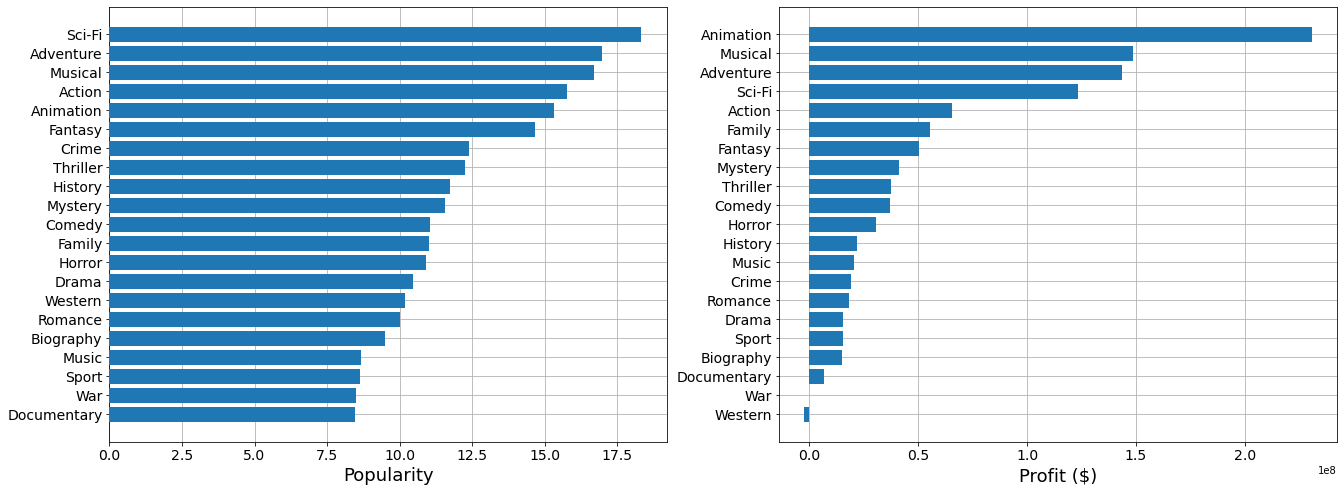

In [37]:
# create plots
genres_fig, genres_axes = plt.subplots(figsize = (22, 8), ncols = 2, nrows = 1)

genres_axes[0].grid(zorder = 0)
genres_axes[0].set_xlabel('Popularity', fontsize = 18)
genres_axes[0].barh(y = genres_popularity['genres_list'], width = genres_popularity['popularity'], zorder=3)
genres_axes[0].tick_params(axis="x", labelsize=14)
genres_axes[0].tick_params(axis="y", labelsize=14)


genres_axes[1].grid(zorder = 0)
genres_axes[1].set_xlabel('Profit ($)', fontsize = 18)
genres_axes[1].barh(y = genres_profit['genres_list'], width = genres_profit['profit'], zorder=3)
genres_axes[1].tick_params(axis='x', labelsize=14)
genres_axes[1].tick_params(axis='y', labelsize=14)

plt.savefig("./images/genres_impact.png", dpi=250)
plt.show();

## **Production Budget**

Based on genres impact analysis above, I would recommand to make a movie that includes genres in animation, adventure, musical and Sci-Fi because these genres are most popular and profitable.

The production budget to produce a movie in those genres requires further analysis.

In [38]:
# select movies whose genre contains animation, adventure, muscial or Sci-Fi
genre_selected_movie = movie_df.loc[movie_df['genres'].str.contains('Animation|Adventure|Musical|Sci-Fi')]

In [39]:
# group data by feature popularity_level and calculate the average production budget in each popularity level
movie_budget = genre_selected_movie[['production_budget', 'popularity_level']].groupby('popularity_level')\
               .mean().sort_values(by ='production_budget')

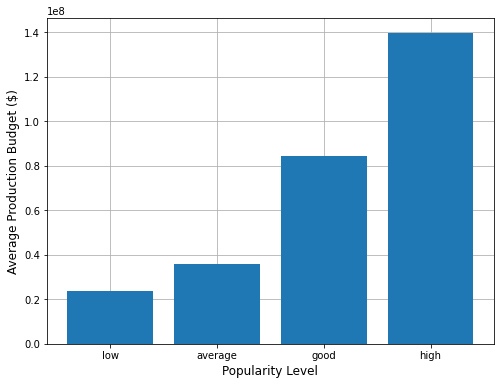

In [40]:
# create plot
budget_fig, budget_ax = plt.subplots(figsize = (8,6))

budget_ax.grid(zorder = 0)
budget_ax.set_xlabel('Popularity Level', fontsize = 12)
budget_ax.set_ylabel('Average Production Budget ($)', fontsize = 12)
budget_ax.bar(x = movie_budget.index, height = movie_budget['production_budget'], zorder=3)


plt.savefig("./images/budget.png", dpi=150)
plt.show();

# **Conclustion**

This analysis provides three recommandations for the first movie of Microsoft's new film studio:

- **Choose May or November to release movie.** Those two months and the following month are either school breaks or holiday seasons. Movies released on those months tend to gain high popularity and profit.
- **Produce a movie in animation, adventure, musical or Sci-Fi, or the combinations of these genres.** Movie genres have great impact on popularity and profit. Microsoft should consider make the first movie in recommended genres for high popularity and profit.
- **Invest 140 million dollars.** The high popularity movie has \\$140 million average production budget. Microsoft should consider invest \\$140 million for its first movie.

## **Next Steps:**

- Better prediction of the genres that can lead to series and peripherals
- Predict over budget outcomes.